In [84]:
import pandas as pd
import numpy as np
import xgboost as xgb 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [343]:
df=pd.read_csv(r"./Arrival Delay.csv")

In [332]:
df.head(2)


(40434, 27)


(36527, 27)

In [333]:
print((40434-36527)/40434)

0.09662660137508038


In [326]:
df.corr().iloc[-1,:]
#Just see the last line for correlation with the variables 1

MONTH                0.097289
DAY_OF_MONTH        -0.053589
DAY_OF_WEEK          0.023138
DEP_DELAY            0.959286
TAXI_OUT             0.223131
CRS_ELAPSED_TIME    -0.074820
DISTANCE            -0.070041
CRS_DEP_M            0.039253
DEP_TIME_M           0.134308
WHEELS_OFF_M         0.131156
CRS_ARR_M            0.043642
Pred_Wheels_On       0.042557
Temperature         -0.021962
Dew Point            0.082458
Humidity             0.101433
Wind Speed           0.064173
Wind Gust            0.071634
Pressure            -0.105812
Before_Arrivals     -0.033081
After_Arrivals      -0.105000
Before_Departures   -0.064214
After_Departures    -0.061327
ARR_DELAY            1.000000
Name: ARR_DELAY, dtype: float64

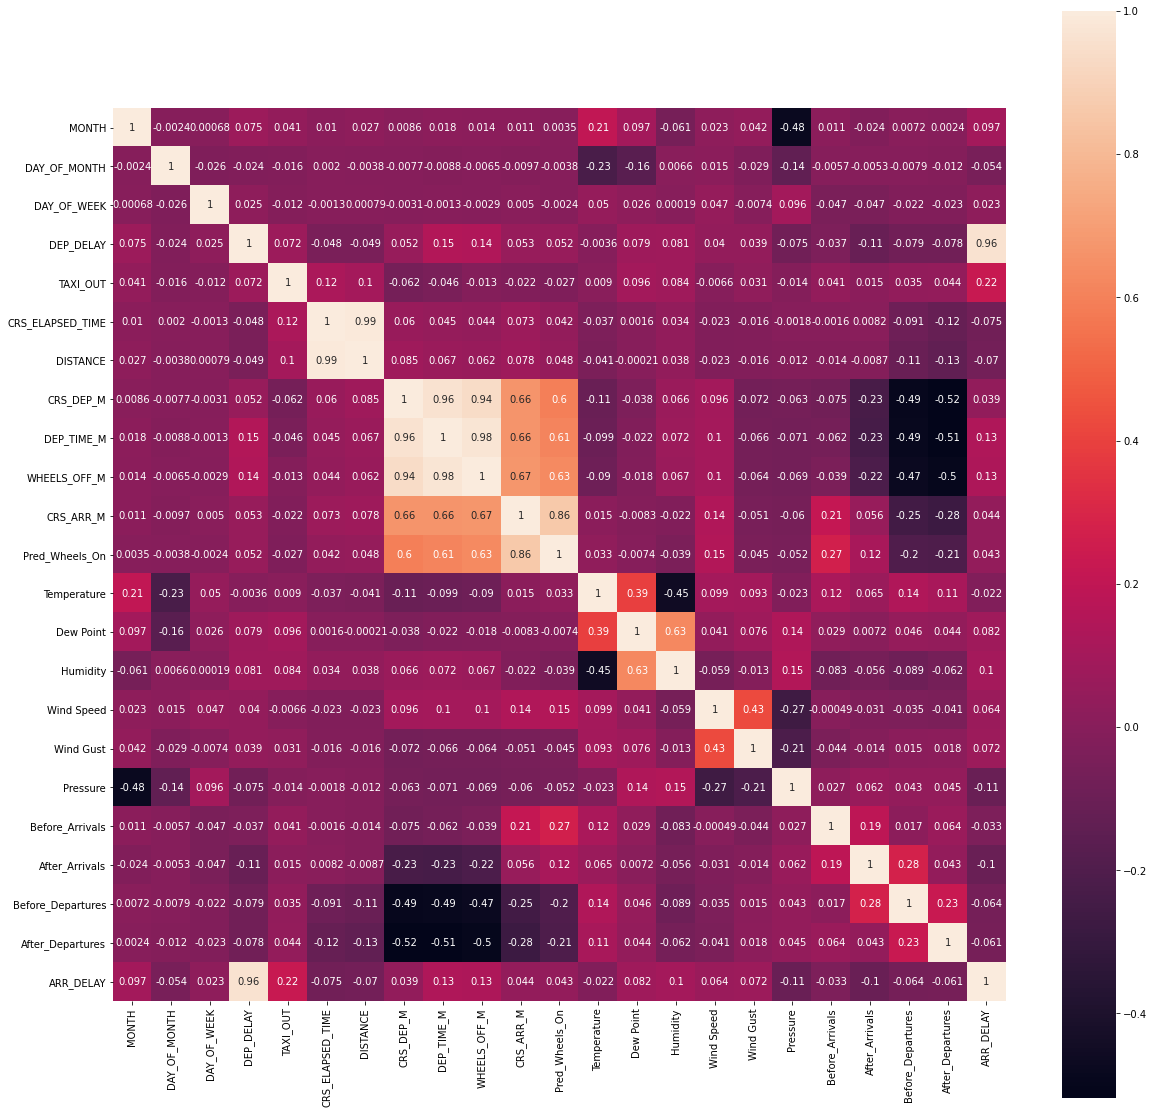

In [5]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=1, square=True,annot =True)

In [327]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
y

0       -29
1       -24
2       -14
3       -20
4       -14
         ..
40429     8
40430    -7
40431    56
40432   -24
40433    58
Name: ARR_DELAY, Length: 40434, dtype: int64

In [89]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#Converting to onehot encoding.
category_list=['OP_UNIQUE_CARRIER','ORIGIN','Wind','Condition']
data=x
for s in category_list:
    label=LabelEncoder()
    data[s]=label.fit_transform(data[s])
    print(label.classes_)
    print(label.transform(label.classes_))
    data=pd.get_dummies(data,columns=[s],prefix=[s])
x2=data
print(x2.columns)
x2.head()

['AA' 'AS' 'B6' 'DL' 'F9' 'HA' 'OO' 'UA' 'WN']
[0 1 2 3 4 5 6 7 8]
['ABQ' 'ACV' 'ASE' 'ATL' 'AUS' 'BFL' 'BNA' 'BOI' 'BOS' 'BUR' 'BWI' 'BZN'
 'CLE' 'CLT' 'CMH' 'CVG' 'DAL' 'DCA' 'DEN' 'DFW' 'DTW' 'EGE' 'EUG' 'EWR'
 'FAT' 'FLL' 'GEG' 'HDN' 'HNL' 'IAD' 'IAH' 'IND' 'JAC' 'JFK' 'KOA' 'LAS'
 'LAX' 'LGB' 'LIH' 'MCI' 'MCO' 'MDW' 'MFR' 'MIA' 'MMH' 'MRY' 'MSN' 'MSP'
 'MSY' 'MTJ' 'OGG' 'OKC' 'OMA' 'ONT' 'ORD' 'OTH' 'PAE' 'PDX' 'PHL' 'PHX'
 'PIT' 'PSC' 'PSP' 'RDD' 'RDM' 'RDU' 'RNO' 'SAN' 'SAT' 'SBA' 'SBP' 'SEA'
 'SLC' 'SMF' 'SNA' 'STL' 'STS' 'SUN' 'TPA' 'TUS' 'TWF' 'XNA']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81]
['CALM' 'E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW'
 'SW' 'VAR' 'W' 'WNW' 'WSW']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
['Cloudy' 'Cloudy / Windy'

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,TAXI_OUT,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,WHEELS_OFF_M,...,Condition_10,Condition_11,Condition_12,Condition_13,Condition_14,Condition_15,Condition_16,Condition_17,Condition_18,Condition_19
0,11,1,5,-4,13,125,522,360,356,369,...,0,0,0,0,0,0,0,0,0,0
1,11,1,5,-9,14,73,199,365,356,370,...,0,0,0,0,0,0,0,0,0,0
2,11,1,5,-3,10,75,250,360,357,367,...,0,0,0,0,0,0,0,0,0,0
3,11,1,5,-5,13,133,651,305,300,313,...,0,0,0,0,0,0,0,0,0,0
4,11,1,5,-3,11,79,262,360,357,368,...,0,0,0,0,0,0,0,0,0,0


In [90]:
#only one hot-encoded
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.1)

In [91]:
#First trying model in deafult setting then will run cross val and grid search.
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import GridSearchCV

In [11]:
from sklearn.linear_model import Lasso
#Lasso
reg1 = Lasso()
reg1.fit(x_train,y_train)
y_pred1=reg1.predict(x_test)
print(mean_absolute_error(y_pred1,y_test))

9.554557784532182


In [92]:
from sklearn.svm import SVR
from sklearn import preprocessing
#SVR
reg2= SVR(kernel='rbf')
scaler=preprocessing.StandardScaler().fit(x_train)
reg2.fit(scaler.transform(x_train),y_train)
y_pred2=reg2.predict(scaler.transform(x_test))
print(mean_absolute_error(y_pred2,y_test))

18.19814390297514


In [13]:
from sklearn.linear_model import ElasticNet
#elaso
reg3 = ElasticNet()
reg3.fit(x_train,y_train)
y_pred3=reg3.predict(x_test)
print(mean_absolute_error(y_pred3,y_test))

9.544550493724559


In [139]:
from sklearn.linear_model import Ridge
#ridge
reg4 = Ridge()
reg4.fit(x_train,y_train)
y_pred4=reg4.predict(x_test)
print(mean_absolute_error(y_pred4,y_test))
print(mean_absolute_error(reg4.predict(x_val),y_val))

8.925359471381597
8.77241477814484


In [15]:
from sklearn.linear_model import BayesianRidge
#baysian ridge
reg5 = BayesianRidge()
reg5.fit(x_train,y_train)
y_pred5=reg5.predict(x_test)
print(mean_absolute_error(y_pred5,y_test))

8.740146585540662


In [16]:
from sklearn.linear_model import HuberRegressor
reg6 = HuberRegressor()
reg6.fit(x_train,y_train)
y_pred6=reg6.predict(x_test)
print(mean_absolute_error(y_pred6,y_test))

9.49267720553921


/home/deepank/.local/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [17]:
import torch
import torch.nn as nn
torch.set_default_tensor_type(torch.DoubleTensor)
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import warnings
warnings.filterwarnings('ignore')

In [23]:
import torch
import torch.nn as nn

class Swish_func(torch.autograd.Function):
    @staticmethod
    def forward(ctx, i):
        result = i * torch.sigmoid(i)
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        i = ctx.saved_variables[0]
        sigmoid_i = torch.sigmoid(i)
        return grad_output * (sigmoid_i * (1 + i * (1 - sigmoid_i)))

class Swish(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        pass
    def forward(self, input_tensor):
        return Swish_func.apply(input_tensor)

In [138]:
x_train,x_val,y_train,y_val=train_test_split(x2,y,test_size=0.1)
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=(0.1/0.9))

In [25]:
#Initialising Tensors
X_train=torch.DoubleTensor(x_train.values)
Y_train=torch.DoubleTensor(y_train).resize_((len(y_train.values),1))
X_Val=torch.DoubleTensor(x_val.values)
X_Test=torch.DoubleTensor(x_test.values)

#criterion is taken as MSE loss according to problem statement.
criterion = torch.nn.MSELoss()


class Model_Bit(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.REG=nn.Sequential(
                nn.Linear(x_train.shape[1],256),
                Swish(),
                nn.Linear(256,128),
                Swish(),
                #nn.BatchNorm1d(128),
                nn.Linear(128,64),
                Swish(),
                #nn.BatchNorm1d(32),
                nn.Linear(64,32),
                Swish(),
                #nn.BatchNorm1d(16),
                nn.Linear(32,8),
                Swish(),
                #nn.BatchNorm1d(6),
                nn.Linear(8,1))
        
    def forward(self, x):
        x = self.REG(x)
        return x
#initialising model
model=Model_Bit()
model.train()
print('Model loaded')

#Taking the Optimizer Adabound which is much better than existing pre-defined optimizers in pytorch library.
optimizer = torch.optim.Adam(model.parameters())

Model loaded


In [26]:
torch.manual_seed(5)
pred=[]
model_best1=0
chk=300
for epoch in range(1,2801):
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, Y_train)
    y_val_pred = model(X_Val)
    loss_val= mean_absolute_error(y_val_pred.detach().numpy(),y_val)
    if epoch % 20==0:
        print(' epoch: ', epoch,' loss: ', loss.item(),' valscore :',loss_val)
    if chk>loss_val:
        chk=loss_val
        model_best1=model.state_dict() 
    loss.backward()
    optimizer.step()

 epoch:  20  loss:  3099.384779365549  valscore : 32.254799648333176
 epoch:  40  loss:  603.4892839848407  valscore : 18.74490067666078
 epoch:  60  loss:  390.8174328392941  valscore : 14.947749776990735
 epoch:  80  loss:  343.2426505426758  valscore : 14.554812610829273
 epoch:  100  loss:  218.79977966144705  valscore : 11.092637274847307
 epoch:  120  loss:  203.4018822439515  valscore : 10.546498099383259
 epoch:  140  loss:  227.83100671846987  valscore : 11.695721397774125
 epoch:  160  loss:  188.77580837616878  valscore : 10.156196652106955
 epoch:  180  loss:  178.9033932699158  valscore : 9.913047429807708
 epoch:  200  loss:  174.06306203407217  valscore : 9.94605326526971
 epoch:  220  loss:  173.86626832923898  valscore : 9.761780641041254
 epoch:  240  loss:  167.93539322712013  valscore : 9.759038026295457
 epoch:  260  loss:  170.20217905661323  valscore : 9.910214225000201
 epoch:  280  loss:  174.03121787731826  valscore : 10.143460007001028
 epoch:  300  loss:  17

 epoch:  2360  loss:  133.41653924231193  valscore : 8.669138724983679
 epoch:  2380  loss:  156.49985183218573  valscore : 10.058258375083025
 epoch:  2400  loss:  130.2149751238341  valscore : 8.732827723828395
 epoch:  2420  loss:  131.53275377048715  valscore : 8.644064123472813
 epoch:  2440  loss:  130.42380793951114  valscore : 8.817578800349787
 epoch:  2460  loss:  137.5546870032247  valscore : 8.773037022836418
 epoch:  2480  loss:  131.8065713136809  valscore : 8.925960327936018
 epoch:  2500  loss:  130.41042687941038  valscore : 8.815077206341888
 epoch:  2520  loss:  130.48763036120474  valscore : 8.836423813570937
 epoch:  2540  loss:  130.36172434662518  valscore : 8.84799093062144
 epoch:  2560  loss:  130.30427440518312  valscore : 8.671799250707023
 epoch:  2580  loss:  129.64632475842268  valscore : 8.786690884027117
 epoch:  2600  loss:  130.21104036953906  valscore : 8.849188895107556
 epoch:  2620  loss:  133.15716323960157  valscore : 9.044469275232435
 epoch:  

In [27]:
model.load_state_dict(model_best1)
print(model.eval())
mean_absolute_error(model(X_Test).detach().numpy(),y_test)

Model_Bit(
  (REG): Sequential(
    (0): Linear(in_features=151, out_features=256, bias=True)
    (1): Swish()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Swish()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Swish()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): Swish()
    (8): Linear(in_features=32, out_features=8, bias=True)
    (9): Swish()
    (10): Linear(in_features=8, out_features=1, bias=True)
  )
)


8.867524158917515

In [317]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
xn=x
xn['OP_UNIQUE_CARRIER'] = lb_make.fit_transform(xn['OP_UNIQUE_CARRIER'])
xn['ORIGIN'] = lb_make.fit_transform(xn['ORIGIN'])
xn['Wind'] = lb_make.fit_transform(xn['Wind'])
xn['Condition'] = lb_make.fit_transform(xn['Condition'])
xn

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEP_DELAY,TAXI_OUT,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,Before_Arrivals,After_Arrivals,Before_Departures,After_Departures
0,11,1,5,6,7,-4,13,125,522,360,...,56,0,0,0,30.14,3,0,6,5,17
1,11,1,5,6,63,-9,14,73,199,365,...,47,0,0,0,30.16,3,0,9,9,13
2,11,1,5,6,1,-3,10,75,250,360,...,47,0,0,0,30.16,3,0,10,9,13
3,11,1,5,6,59,-5,13,133,651,305,...,47,0,0,0,30.16,3,1,10,10,13
4,11,1,5,6,69,-3,11,79,262,360,...,47,0,0,0,30.16,3,1,10,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40429,1,31,5,8,18,38,10,170,967,1305,...,93,15,16,0,30.15,13,0,0,0,0
40430,1,31,5,7,23,49,19,404,2565,1200,...,93,15,16,0,30.15,13,0,0,0,0
40431,1,31,5,1,71,48,39,136,679,1290,...,93,15,16,0,30.15,13,0,0,0,0
40432,1,31,5,3,3,12,9,337,2139,1282,...,93,15,16,0,30.15,13,0,0,0,0


In [413]:
len(xn.columns)

26

In [319]:
xn=xn.rename(columns={'MONTH':'M','DAY_OF_MONTH':'D','DAY_OF_WEEK':'W','OP_UNIQUE_CARRIER':'A', 'ORIGIN':'org',
       'DEP_DELAY':'d_del', 'TAXI_OUT':'TO', 'CRS_ELAPSED_TIME':'s_elp', 'DISTANCE':'dest', 'CRS_DEP_M':'s_dep',
       'DEP_TIME_M':'a_dep', 'WHEELS_OFF_M':'WO', 'CRS_ARR_M':'s_arr', 'Pred_Wheels_On':'e_land', 'Before_Arrivals':'b2_arr',
       'After_Arrivals':'a2_arr', 'Before_Departures':'b2_dep', 'After_Departures':'a2_dep',
        'Temperature':'temp', 'Dew Point':'dew', 'Humidity':'hum', 'Wind':'wind', 'Wind Speed':'w_spd',
       'Wind Gust':'gust', 'Pressure':'prs', 'Condition':'cond'})


In [320]:
#only one hot-encoded
x_train,x_test,y_train,y_test=train_test_split(xn,y,test_size=0.1)


In [185]:
xn

,M,D,W,A,org,d_del,TO,s_elp,dest,s_dep,...,wind,w_spd,gust,prs,cond,b_arr,a_arr,b_dep,a_dep,OP_CARRIER
0,11,1,5,6,7,-4,13,125,522,360,...,0,0,0,30.14,3,0,6,5,17,6
1,11,1,5,6,63,-9,14,73,199,365,...,0,0,0,30.16,3,0,9,9,13,6
2,11,1,5,6,1,-3,10,75,250,360,...,0,0,0,30.16,3,0,10,9,13,6
3,11,1,5,6,59,-5,13,133,651,305,...,0,0,0,30.16,3,1,10,10,13,6
4,11,1,5,6,69,-3,11,79,262,360,...,0,0,0,30.16,3,1,10,10,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40429,1,31,5,8,18,38,10,170,967,1305,...,15,16,0,30.15,13,0,0,0,0,8
40430,1,31,5,7,23,49,19,404,2565,1200,...,15,16,0,30.15,13,0,0,0,0,7
40431,1,31,5,1,71,48,39,136,679,1290,...,15,16,0,30.15,13,0,0,0,0,1
40432,1,31,5,3,3,12,9,337,2139,1282,...,15,16,0,30.15,13,0,0,0,0,3


In [75]:
grid_param = {
    'nn_estimators': [80,300],
    'max_depth': [8,10],
    'eta':[0.25],
    'lambda':[2,10],
    'alpha':[10]
}

In [76]:
import xgboost as xgb 
xg_reg=xgb.XGBRegressor(objective='reg:squarederror')
gd_sr1 = GridSearchCV(estimator=xg_reg,param_grid=grid_param,scoring='neg_mean_absolute_error',cv=5,n_jobs=-1,verbose=10)
gd_sr1.fit(x_train, y_train)
print(gd_sr1.best_params_)
print(mean_absolute_error(gd_sr1.best_estimator_.predict(x_test),y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:  1.0min remaining:   20.9s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:  1.4min remaining:   11.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.5min finished


{'alpha': 10, 'eta': 0.25, 'lambda': 2, 'max_depth': 8, 'nn_estimators': 80}
7.276920727243174


In [173]:
print(gd_sr1.best_params_)
print(gd_sr2.best_score_)
print(mean_absolute_error(gd_sr1.best_estimator_.predict(x_test),y_test))
xg_reg=gd_sr1.best_estimator_
xgb.plot_importance(xg_reg)
plt.show()


{'alpha': 10, 'eta': 0.25, 'lambda': 2, 'max_depth': 8, 'nn_estimators': 80}
-7.297766875940736


ValueError: feature_names mismatch: ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEP_DELAY', 'TAXI_OUT', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M', 'WHEELS_OFF_M', 'CRS_ARR_M', 'Pred_Wheels_On', 'Temperature', 'Dew Point', 'Humidity', 'Wind', 'Wind Speed', 'Wind Gust', 'Pressure', 'Condition', 'Before_Arrivals', 'After_Arrivals', 'Before_Departures', 'After_Departures', 'OP_CARRIER'] ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DELAY', 'TAXI_OUT', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M', 'WHEELS_OFF_M', 'CRS_ARR_M', 'Pred_Wheels_On', 'Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'Before_Arrivals', 'After_Arrivals', 'Before_Departures', 'After_Departures', 'OP_UNIQUE_CARRIER_0', 'OP_UNIQUE_CARRIER_1', 'OP_UNIQUE_CARRIER_2', 'OP_UNIQUE_CARRIER_3', 'OP_UNIQUE_CARRIER_4', 'OP_UNIQUE_CARRIER_5', 'OP_UNIQUE_CARRIER_6', 'OP_UNIQUE_CARRIER_7', 'OP_UNIQUE_CARRIER_8', 'ORIGIN_0', 'ORIGIN_1', 'ORIGIN_2', 'ORIGIN_3', 'ORIGIN_4', 'ORIGIN_5', 'ORIGIN_6', 'ORIGIN_7', 'ORIGIN_8', 'ORIGIN_9', 'ORIGIN_10', 'ORIGIN_11', 'ORIGIN_12', 'ORIGIN_13', 'ORIGIN_14', 'ORIGIN_15', 'ORIGIN_16', 'ORIGIN_17', 'ORIGIN_18', 'ORIGIN_19', 'ORIGIN_20', 'ORIGIN_21', 'ORIGIN_22', 'ORIGIN_23', 'ORIGIN_24', 'ORIGIN_25', 'ORIGIN_26', 'ORIGIN_27', 'ORIGIN_28', 'ORIGIN_29', 'ORIGIN_30', 'ORIGIN_31', 'ORIGIN_32', 'ORIGIN_33', 'ORIGIN_34', 'ORIGIN_35', 'ORIGIN_36', 'ORIGIN_37', 'ORIGIN_38', 'ORIGIN_39', 'ORIGIN_40', 'ORIGIN_41', 'ORIGIN_42', 'ORIGIN_43', 'ORIGIN_44', 'ORIGIN_45', 'ORIGIN_46', 'ORIGIN_47', 'ORIGIN_48', 'ORIGIN_49', 'ORIGIN_50', 'ORIGIN_51', 'ORIGIN_52', 'ORIGIN_53', 'ORIGIN_54', 'ORIGIN_55', 'ORIGIN_56', 'ORIGIN_57', 'ORIGIN_58', 'ORIGIN_59', 'ORIGIN_60', 'ORIGIN_61', 'ORIGIN_62', 'ORIGIN_63', 'ORIGIN_64', 'ORIGIN_65', 'ORIGIN_66', 'ORIGIN_67', 'ORIGIN_68', 'ORIGIN_69', 'ORIGIN_70', 'ORIGIN_71', 'ORIGIN_72', 'ORIGIN_73', 'ORIGIN_74', 'ORIGIN_75', 'ORIGIN_76', 'ORIGIN_77', 'ORIGIN_78', 'ORIGIN_79', 'ORIGIN_80', 'ORIGIN_81', 'Wind_0', 'Wind_1', 'Wind_2', 'Wind_3', 'Wind_4', 'Wind_5', 'Wind_6', 'Wind_7', 'Wind_8', 'Wind_9', 'Wind_10', 'Wind_11', 'Wind_12', 'Wind_13', 'Wind_14', 'Wind_15', 'Wind_16', 'Wind_17', 'Condition_0', 'Condition_1', 'Condition_2', 'Condition_3', 'Condition_4', 'Condition_5', 'Condition_6', 'Condition_7', 'Condition_8', 'Condition_9', 'Condition_10', 'Condition_11', 'Condition_12', 'Condition_13', 'Condition_14', 'Condition_15', 'Condition_16', 'Condition_17', 'Condition_18', 'Condition_19']
expected OP_CARRIER, ORIGIN, OP_UNIQUE_CARRIER, Wind, Condition in input data
training data did not have the following fields: ORIGIN_72, ORIGIN_76, ORIGIN_24, ORIGIN_69, OP_UNIQUE_CARRIER_3, ORIGIN_21, Wind_1, Wind_9, ORIGIN_43, Condition_0, ORIGIN_63, Condition_1, ORIGIN_9, ORIGIN_3, Wind_4, ORIGIN_28, Condition_2, ORIGIN_81, ORIGIN_8, ORIGIN_55, ORIGIN_17, OP_UNIQUE_CARRIER_4, Wind_13, ORIGIN_7, ORIGIN_39, ORIGIN_68, ORIGIN_45, Condition_18, ORIGIN_16, ORIGIN_38, ORIGIN_29, ORIGIN_14, Condition_15, ORIGIN_35, ORIGIN_15, Wind_8, Condition_14, OP_UNIQUE_CARRIER_8, ORIGIN_25, OP_UNIQUE_CARRIER_1, Wind_16, ORIGIN_34, ORIGIN_23, ORIGIN_57, ORIGIN_65, ORIGIN_19, ORIGIN_75, Wind_17, ORIGIN_78, Condition_12, ORIGIN_0, ORIGIN_50, ORIGIN_71, OP_UNIQUE_CARRIER_0, ORIGIN_61, ORIGIN_64, Condition_16, Condition_5, ORIGIN_20, ORIGIN_26, ORIGIN_30, ORIGIN_41, ORIGIN_56, ORIGIN_12, Wind_0, ORIGIN_52, Condition_6, Condition_11, Wind_10, Condition_17, Wind_14, ORIGIN_10, Condition_10, OP_UNIQUE_CARRIER_2, ORIGIN_59, ORIGIN_79, Wind_3, Condition_8, ORIGIN_70, ORIGIN_44, ORIGIN_53, ORIGIN_2, ORIGIN_36, ORIGIN_1, OP_UNIQUE_CARRIER_6, ORIGIN_77, ORIGIN_40, ORIGIN_31, ORIGIN_47, ORIGIN_37, OP_UNIQUE_CARRIER_7, Wind_2, ORIGIN_49, Wind_6, ORIGIN_6, ORIGIN_13, ORIGIN_11, ORIGIN_18, ORIGIN_60, ORIGIN_4, ORIGIN_73, ORIGIN_66, OP_UNIQUE_CARRIER_5, ORIGIN_58, Condition_19, Condition_4, Wind_15, Condition_13, ORIGIN_54, Wind_5, Wind_12, ORIGIN_74, Wind_11, Condition_7, ORIGIN_5, ORIGIN_80, ORIGIN_22, Wind_7, Condition_3, ORIGIN_27, Condition_9, ORIGIN_33, ORIGIN_42, ORIGIN_32, ORIGIN_46, ORIGIN_62, ORIGIN_67, ORIGIN_51, ORIGIN_48

In [82]:
np.savetxt("xg1.csv",gd_sr1.best_estimator_.predict(x_test) , delimiter=",")

In [321]:
grid_param = {
    'n_estimators': [1000],
    'learning_rate':[0.5],
    'reg_lambda':[2],
    'alpha':[2]
}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.8s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.3s finished


{'alpha': 2, 'learning_rate': 0.5, 'n_estimators': 1000, 'reg_lambda': 2}
8.292956755984608


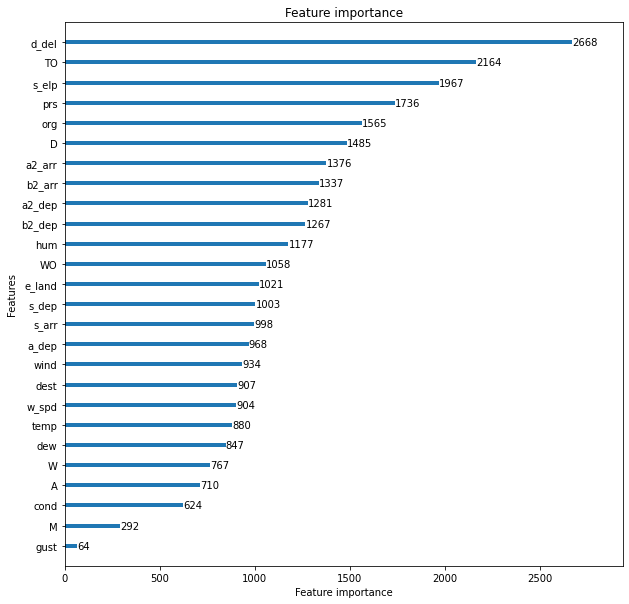

In [322]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
gd_sr2 = GridSearchCV(estimator=lgbm,param_grid=grid_param,scoring='neg_mean_absolute_error',cv=5,n_jobs=-1,verbose=4)
gd_sr2.fit(x_train, y_train)
print(gd_sr2.best_params_)
print(mean_absolute_error(gd_sr2.best_estimator_.predict(x_test),y_test))
lgbm=gd_sr2.best_estimator_
import lightgbm
lightgbm.plot_importance(lgbm,grid=False,figsize=(10,10))
plt.show()

In [174]:
print(gd_sr2.best_params_)
print(mean_absolute_error(gd_sr2.best_estimator_.predict(x_test),y_test))
print(mean_squared_error(gd_sr2.best_estimator_.predict(x_test),y_test))
lgbm=gd_sr2.best_estimator_
import lightgbm
lightgbm.plot_importance(lgbm,grid=False)
plt.show()
print("Training error:- ",mean_absolute_error(gd_sr2.best_estimator_.predict(x_train),y_train))
print("Training error(MSE):- ",mean_squared_error(gd_sr2.best_estimator_.predict(x_train),y_train))

{'alpha': 2, 'learning rate': 0.002, 'n_estimators': 1000, 'reg_lambda': 2}


ValueError: Number of features of the model must match the input. Model n_features_ is 26 and input n_features is 151 

In [96]:
np.savetxt("ligth1.csv",gd_sr2.best_estimator_.predict(x_test) , delimiter=",")

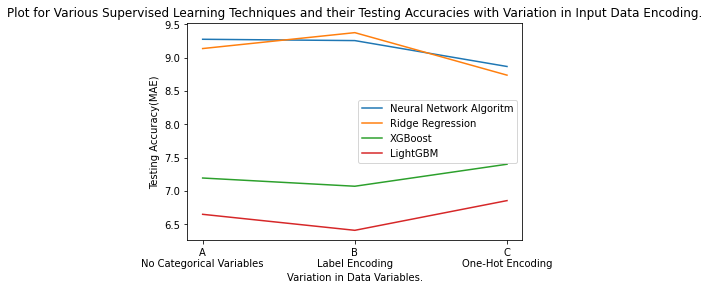

In [117]:
#PLOTS######
#categorical
from matplotlib import pyplot as plt

plt.plot([9.275673272331014,9.25589535832706,8.867524158917515], label='Neural Network Algoritm')
plt.plot([9.136464705299057,9.37507523533906, 8.737579677394626], label='Ridge Regression')
plt.plot([7.194730925373988,7.071449354939548,7.4013923724612045], label='XGBoost')
plt.plot([6.650383018611004,6.410387494797,6.855929133473096], label='LightGBM')
positions = (0, 1,2 )
labels = ("A\nNo Categorical Variables", "B\nLabel Encoding", "C\nOne-Hot Encoding")
plt.xticks(positions, labels)
# Add labels and title
plt.title("Plot for Various Supervised Learning Techniques and their Testing Accuracies with Variation in Input Data Encoding.")
plt.xlabel("Variation in Data Variables.")
plt.ylabel("Testing Accuracy(MAE)")
 
plt.legend()
plt.show()

9.24
9.14
7.19
6.65
9.26
9.38
7.07
6.41
8.87
8.74
7.41
6.86


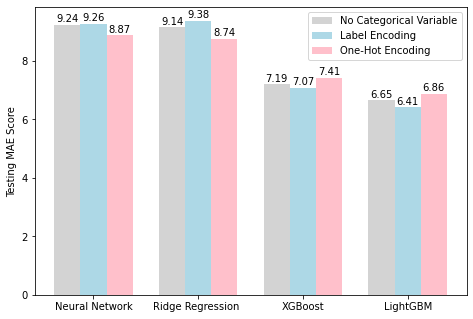

In [261]:
import numpy as np
import matplotlib.pyplot as plt

x=[[9.235673272331014, 9.136464705299057, 7.194730925373988, 6.650383018611004],
[9.25589535832706,9.37507523533906,7.071449354939548,6.410387494797],
[8.867524158917515, 8.737579677394626,7.4083923724612045,6.855929133473096]]

X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
r1=ax.bar(X + 0.00, x[0], color = 'lightgrey', width = 0.25,label="No Categorical Variable")
r2=ax.bar(X + 0.25, x[1], color = 'lightblue', width = 0.25,label="Label Encoding")
r3=ax.bar(X + 0.50, x[2], color = 'pink', width = 0.25,label="One-Hot Encoding")
labels = ("A\nNo Categorical Variables", "B\nLabel Encoding", "C\nOne-Hot Encoding")
positions = (0.25, 1.25,2.25,3.25 )
labels = ("Neural Network", "Ridge Regression ", "XGBoost","LightGBM")
plt.xticks(positions, labels)
plt.ylabel("Testing MAE Score")
plt.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        print(np.round(height,2))
        ax.annotate('{}'.format(np.round(height,2)),
                    xy=(np.round(rect.get_x() + rect.get_width() / 2,2), np.round(height,2)),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(r1)
autolabel(r2)
autolabel(r3)

fig.tight_layout()



plt.show()

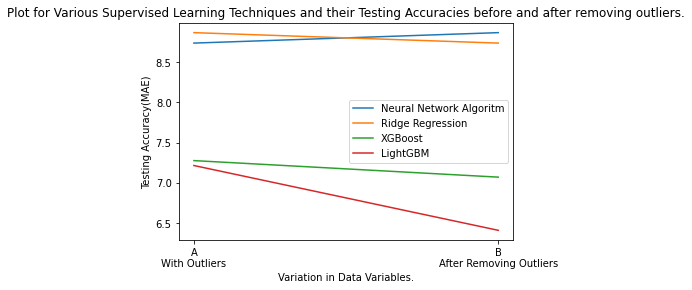

In [137]:
#PLOTS######
#categorical
from matplotlib import pyplot as plt

plt.plot([8.737579677394626,8.867524158917515], label='Neural Network Algoritm')
plt.plot([8.867524158917515,8.737579677394626], label='Ridge Regression')
plt.plot([7.276920727243174,7.071449354939548], label='XGBoost')
plt.plot([7.215822826090151,6.410387494797], label='LightGBM')
positions = (0, 1)
labels = ("A\nWith Outliers", "B\nAfter Removing Outliers")
plt.xticks(positions, labels)
# Add labels and title
plt.title("Plot for Various Supervised Learning Techniques and their Testing Accuracies before and after removing outliers.")
plt.xlabel("Variation in Data Variables.")
plt.ylabel("Testing Accuracy(MAE)")
 
plt.legend()
plt.show()

8.87
8.93
7.28
7.22
8.48
8.74
7.07
6.41


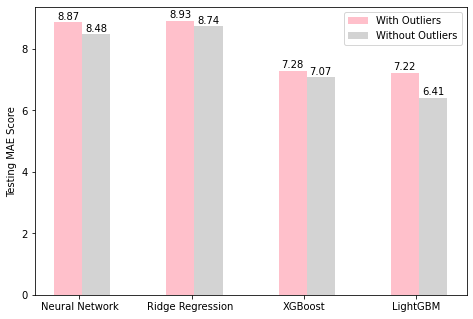

In [257]:
import numpy as np
import matplotlib.pyplot as plt
x=[[8.867524158917515,8.925359471381597,7.276920727243174,7.215822826090151],
    [8.48,8.737579677394626,7.071449354939548,6.410387494797]]


X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
r1=ax.bar(X + 0.40, x[0], color = 'pink', width = 0.25,label="With Outliers")
r2=ax.bar(X + 0.65, x[1], color = 'lightgrey', width = 0.25,label="Without Outliers")
positions = (0.50, 1.50,2.50,3.50 )
labels = ("Neural Network", "Ridge Regression ", "XGBoost","LightGBM")
plt.xticks(positions, labels)
plt.ylabel("Testing MAE Score")
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        print(np.round(height,2))
        ax.annotate('{}'.format(np.round(height,2)),
                    xy=(np.round(rect.get_x() + rect.get_width() / 2,2), np.round(height,2)),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(r1)
autolabel(r2)
plt.legend()
plt.show()

8.41
8.53
6.51
6.29
8.59
8.67
6.86
6.75
8.87
8.74
6.77
6.41


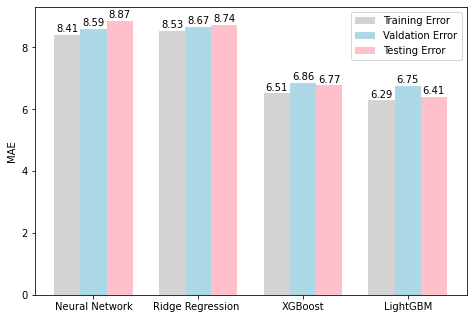

In [8]:
#PLOTS######
#categorical
from matplotlib import pyplot as plt

x=[[8.41,8.53,6.51,6.29],[8.58750792751374,8.67241477814484,6.857124599322188,6.754275095742427],[8.867524158917515,8.737579677394626,6.773391158604276,6.410387494797]] 

X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
r1=ax.bar(X + 0.25, x[0], color = 'lightgrey', width = 0.25,label="Training Error")
r2=ax.bar(X + 0.50, x[1], color = 'lightblue', width = 0.25,label="Valdation Error")
r3=ax.bar(X + 0.75, x[2], color = 'pink', width = 0.25,label="Testing Error")
positions = (0.50, 1.50,2.50,3.50 )
labels = ("Neural Network", "Ridge Regression ", "XGBoost","LightGBM")
plt.xticks(positions, labels)
plt.ylabel("MAE")
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        print(np.round(height,2))
        ax.annotate('{}'.format(np.round(height,2)),
                    xy=(np.round(rect.get_x() + rect.get_width() / 2,2), np.round(height,2)),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(r1)
autolabel(r2)
autolabel(r3)
plt.legend()
plt.show()

4.93
4.84
3.84
3.77
5.01
4.92
4.42
4.35
4.96
4.89
4.28
4.2


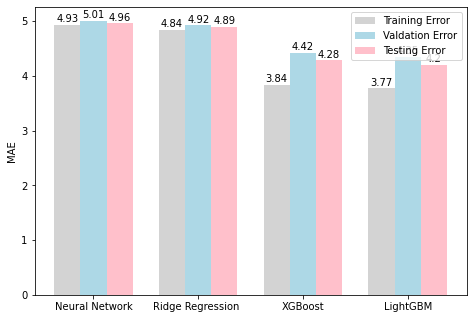

In [9]:
#PLOTS######
#categorical
import numpy as np
from matplotlib import pyplot as plt

4.910822484699909
4.963562544366546
4.82663624058098

x=[[4.92663624058098,4.841048359658992,3.84,3.77],[5.01,4.92,4.42,4.35],[4.96,4.89,4.28,4.2]] 

X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
r1=ax.bar(X + 0.25, x[0], color = 'lightgrey', width = 0.25,label="Training Error")
r2=ax.bar(X + 0.50, x[1], color = 'lightblue', width = 0.25,label="Valdation Error")
r3=ax.bar(X + 0.75, x[2], color = 'pink', width = 0.25,label="Testing Error")
positions = (0.50, 1.50,2.50,3.50)
labels = ("Neural Network", "Ridge Regression ", "XGBoost","LightGBM")
plt.xticks(positions, labels)
plt.ylabel("MAE")
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        print(np.round(height,2))
        ax.annotate('{}'.format(np.round(height,2)),
                    xy=(np.round(rect.get_x() + rect.get_width() / 2,2), np.round(height,2)),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(r1)
autolabel(r2)
autolabel(r3)
plt.legend()
plt.show()

In [288]:
df=pd.read_csv(r"./Arrival Delay.csv")
index=df[(df['ARR_DELAY']>62.5) | (df['ARR_DELAY']<-69.5)].index
df.drop(index, inplace=True)
df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN',
       'DEP_DELAY', 'TAXI_OUT', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M',
       'DEP_TIME_M', 'WHEELS_OFF_M', 'CRS_ARR_M', 'Pred_Wheels_On',
       'Temperature', 'Dew Point', 'Humidity', 'Wind', 'Wind Speed',
       'Wind Gust', 'Pressure', 'Condition', 'Before_Arrivals',
       'After_Arrivals', 'Before_Departures', 'After_Departures', 'ARR_DELAY'],
      dtype='object')

[29.5  29.61 29.72 29.82 29.93 30.04 30.15 30.26 30.36 30.47 30.58] 11


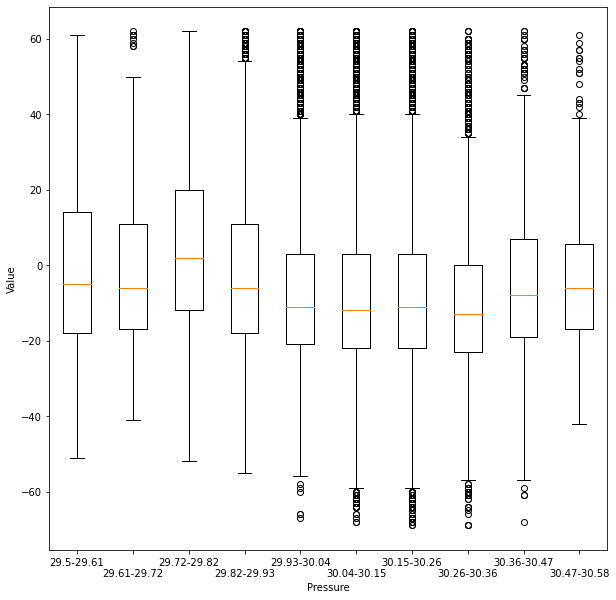

In [302]:
import pandas as pd

k=10
delay=df['ARR_DELAY']
pr=df["Pressure"]
d=(pr.describe()['max']-pr.describe()['min'])/k
r=[i for i in np.arange(pr.describe()['min'],pr.describe()['max']+d*0.99,d)]
data=[0]*k
r=np.round(r,2)
print(r,len(r))
for i in range(k-1,-1,-1):
   temp=[]
   for j in range(0,df.shape[0]):
       if df.iloc[j,20]>r[i] and df.iloc[j,20]<r[i+1]:
           temp.append(df.iloc[j,-1])
   data[i]=temp
   

fig, ax = plt.subplots(figsize=(k, 10))
bp = ax.boxplot(data)
positions = [i for i in range(1,k+1,1)]
labels=[0]*k
for i in range(0,len(r)-1):
    if i%2==0:
        labels[i]=str(r[i])+'-'+str(r[i+1])
    else:
        labels[i]='\n'+str(r[i])+'-'+str(r[i+1])
plt.xticks(positions, labels)
ax.set_xlabel('Pressure')
ax.set_ylabel('Value')
plt.show()


[48.0, 86.0, 124.0, 162.0, 200.0, 238.0, 276.0, 314.0, 352.0, 390.0, 428.0] 11


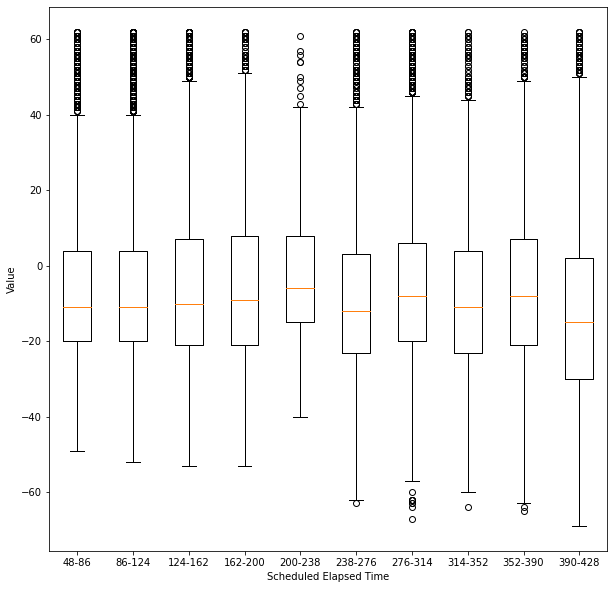

In [294]:
import pandas as pd

k=10
delay=df['ARR_DELAY']
pr=df["CRS_ELAPSED_TIME"]
d=(pr.describe()['max']-pr.describe()['min'])/k
r=[i for i in np.arange(pr.describe()['min'],pr.describe()['max']+d,d)]
print(r,len(r))
data=[0]*k
r=np.round(r).astype(int)
for i in range(k-1,-1,-1):
   temp=[]
   for j in range(0,df.shape[0]):
       if df.iloc[j,7]>r[i] and df.iloc[j,7]<r[i+1]:
           temp.append(df.iloc[j,-1])
   data[i]=temp
   

fig, ax = plt.subplots(figsize=(k, 10))
bp = ax.boxplot(data)
positions = [i for i in range(1,k+1,1)]
labels=[0]*k
for i in range(0,len(r)-1):
    labels[i]=str(r[i])+'-'+str(r[i+1])a
plt.xticks(positions, labels)
ax.set_xlabel('Scheduled Elapsed Time')
ax.set_ylabel('Value')
plt.show()


[29.5   29.608 29.716 29.824 29.932 30.04  30.148 30.256 30.364 30.472
 30.58 ] 11


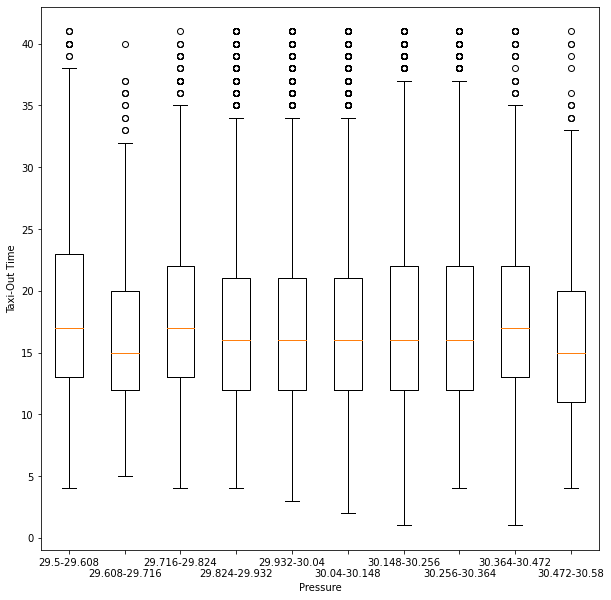

In [308]:
import pandas as pd
index=df[(df['TAXI_OUT']>41)].index
df.drop(index, inplace=True)
k=10
pr=df["Pressure"]
d=(pr.describe()['max']-pr.describe()['min'])/k
r=[i for i in np.arange(pr.describe()['min'],pr.describe()['max']+d*0.99,d)]
data=[0]*k
r=np.round(r,3)
print(r,len(r))
for i in range(k-1,-1,-1):
   temp=[]
   for j in range(0,df.shape[0]):
       if df.iloc[j,20]>r[i] and df.iloc[j,20]<r[i+1]:
           temp.append(df.iloc[j,6])
   data[i]=temp
   

fig, ax = plt.subplots(figsize=(k, 10))
bp = ax.boxplot(data)
positions = [i for i in range(1,k+1,1)]
labels=[0]*k
for i in range(0,len(r)-1):
    if i%2==0:
        labels[i]=str(r[i])+'-'+str(r[i+1])
    else:
        labels[i]='\n'+str(r[i])+'-'+str(r[i+1])
plt.xticks(positions, labels)
ax.set_xlabel('Pressure')
ax.set_ylabel('Taxi-Out Time')
plt.show()


In [355]:
df['ARR_DELAY'].describe()

count    40434.000000
mean         8.136247
std         61.579573
min        -78.000000
25%        -20.000000
50%         -8.000000
75%         13.000000
max       1909.000000
Name: ARR_DELAY, dtype: float64

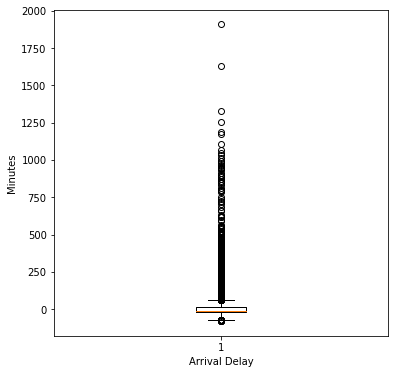

In [350]:
import pandas as pd
fig, ax = plt.subplots(figsize=(6, 6))
bp = ax.boxplot(df['ARR_DELAY'])
ax.set_xlabel('Arrival Delay')
ax.set_ylabel('Minutes')
plt.show()


Skewness: 6.886546
Kurtosis: 99.793220


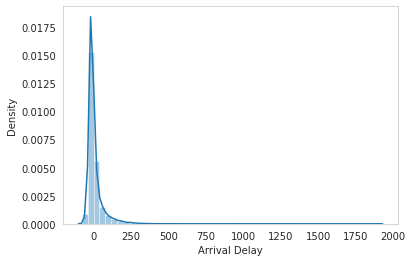

In [412]:
df=df.rename(columns={'ARR_DELAY':'Arrival Delay'})
import seaborn as sns
sns.set_style("whitegrid")
ax=sns.distplot(df['Arrival Delay'])
ax.set(ylabel='Density')
from scipy.stats import kurtosis, skew
#print(kurtosis(df['Arrival Delay']))
#print(skew(df['Arrival Delay']))
ax.grid(False)
#ax.text(500,0.015, "Skewness: "+str(np.round(skew(df['Arrival Delay']),4)), horizontalalignment='left', size='large', color='black', weight='semibold')
#ax.text(500,0.014, "Kurtosis:   "+str(np.round(kurtosis(df['Arrival Delay']),4)), horizontalalignment='left', size='large', color='black', weight='semibold')
print("Skewness: %f" % df['Arrival Delay'].skew())
print("Kurtosis: %f" % df['Arrival Delay'].kurt())